In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv('data\ex2data1.txt')
exam1 = data.values[:, 0:1]
exam2 = data.values[:, 1:2]
admit = data.values[:, 2:3]

X = data.values[:, 0:2]

In [3]:
#1. Sigmoid Function 
def sigmoid(z) : 
    return 1 / (1 + np.exp(-z))

In [4]:
#2. Cost Function
def computeCost(theta, X, Y): 
    m = Y.size
    h = sigmoid(X.dot(theta))
    J = -1/m*((Y.T).dot(np.log(h)) + (1-Y.T).dot(np.log(1-h))) 
    if np.isnan(J[0]):
        return(np.inf)
    return J

nX = np.c_[np.ones(X.shape[0]), X]
theta = np.zeros((nX.shape[1],1))
cost = computeCost(theta, nX, admit)
print(cost)

[[0.69314718]]


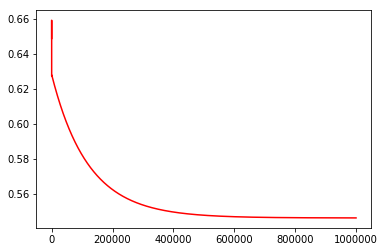

In [42]:
#3. Gradient Descent
def gradientDescent(theta, X, Y, alpha=0.0002, num_iters=1000000):
    m = Y.size
    h = sigmoid(X.dot(theta))
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        h = X.dot(theta)
        #theta = theta - alpha*(h-Y).T.dot(X).T  #이 부분이 핵심인데... 이제 맞나?
        theta = theta - alpha*(1/m)*X.T.dot(h-Y)
        J_history[i] = computeCost(theta, X, Y)
    return(theta, J_history)    


#4. Calculate Optimized Theta
(opttheta, costhistory) = gradientDescent(theta, nX, admit)

plt.plot(costhistory, c='red')

In [43]:
#Predict from New Data
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta)) >= threshold
    return(p.astype('int'))

p = predict(opttheta, nX) 
#print(p)
pY = np.c_[p,admit]
sum = 0
for i in range(admit.size):
    if p[i] == admit[i]:
        sum += 1
        

print(sum)
print('Train accuracy {}%'.format((sum/p.size)*100))

65
Train accuracy 65.65656565656566%


In [45]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

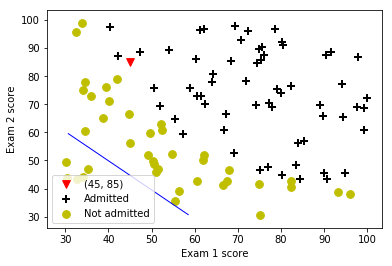

In [48]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
data = np.loadtxt('data\ex2data1.txt', delimiter=',')

plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = nX[:,2].min(), nX[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(opttheta))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');